In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.preprocessing import Normalizer

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
import xgboost as xgb

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold,LeaveOneOut,RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import ExtraTreesRegressor

from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix

from scipy.stats import gaussian_kde
import numpy as np

In [2]:
data_class_x_train = pd.read_excel("one-hot-xunlian-96.xlsx")
data_class_x_train

,reaction temperature,alkaline concentration,alcohol-ether volume ratio,GI,EG,EtOH,NBA,NPA,Pentanol,MeOH,NaOH,KOH,DX,DME,MOE,THF,degradation rate
0,40,4,4.000000,0,0,0,0,0,1,0,1,0,0,0,1,0,48.13
1,40,1,1.500000,0,0,0,0,0,0,1,0,1,0,1,0,0,50.96
2,40,4,4.000000,0,0,1,0,0,0,0,1,0,0,0,1,0,68.94
3,40,3,0.666667,0,0,0,0,1,0,0,0,1,0,0,0,1,66.41
4,40,2,0.250000,0,0,0,1,0,0,0,1,0,1,0,0,0,38.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,80,4,0.666667,0,0,0,0,0,0,1,1,0,0,0,0,1,97.18
92,80,1,1.500000,0,0,0,0,1,0,0,1,0,0,1,0,0,96.47
93,80,2,0.250000,0,0,0,1,0,0,0,0,1,1,0,0,0,80.90
94,80,4,0.666667,0,0,0,0,0,1,0,1,0,0,0,0,1,95.97


In [3]:
x_class_train = data_class_x_train.iloc[:,0:-1]
y_class_train = data_class_x_train.iloc[:,-1]

In [4]:
x_class_train

,reaction temperature,alkaline concentration,alcohol-ether volume ratio,GI,EG,EtOH,NBA,NPA,Pentanol,MeOH,NaOH,KOH,DX,DME,MOE,THF
0,40,4,4.000000,0,0,0,0,0,1,0,1,0,0,0,1,0
1,40,1,1.500000,0,0,0,0,0,0,1,0,1,0,1,0,0
2,40,4,4.000000,0,0,1,0,0,0,0,1,0,0,0,1,0
3,40,3,0.666667,0,0,0,0,1,0,0,0,1,0,0,0,1
4,40,2,0.250000,0,0,0,1,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,80,4,0.666667,0,0,0,0,0,0,1,1,0,0,0,0,1
92,80,1,1.500000,0,0,0,0,1,0,0,1,0,0,1,0,0
93,80,2,0.250000,0,0,0,1,0,0,0,0,1,1,0,0,0
94,80,4,0.666667,0,0,0,0,0,1,0,1,0,0,0,0,1


In [5]:
data_class_x_test = pd.read_excel("one-hot-ceshi-24.xlsx")
data_class_x_test

,reaction temperature,alkaline concentration,alcohol-ether volume ratio,GI,EG,EtOH,NBA,NPA,Pentanol,MeOH,NaOH,KOH,DX,DME,MOE,THF,degradation rate
0,40,4,4.000000,0,0,0,0,0,0,1,1,0,0,0,1,0,81.78
1,40,3,0.666667,0,0,1,0,0,0,0,0,1,0,0,0,1,82.75
2,40,2,0.250000,0,0,0,0,1,0,0,1,0,1,0,0,0,42.56
3,40,1,1.500000,0,0,0,1,0,0,0,0,1,0,1,0,0,48.16
4,40,3,0.666667,0,1,0,0,0,0,0,0,1,0,0,0,1,35.79
5,40,2,0.250000,1,0,0,0,0,0,0,1,0,1,0,0,0,17.62
6,40,4,4.000000,0,1,0,0,0,0,0,1,0,0,0,1,0,12.89
7,40,1,1.500000,0,0,1,0,0,0,0,0,1,0,1,0,0,3.94
8,60,3,0.666667,0,0,0,1,0,0,0,1,0,0,0,0,1,63.49
9,60,1,0.250000,0,0,0,0,0,0,1,0,1,0,0,1,0,56.14


In [6]:
x_class_test = data_class_x_test.iloc[:,0:-1]
y_class_test  = data_class_x_test.iloc[:,-1]

In [7]:
x_class_test

,reaction temperature,alkaline concentration,alcohol-ether volume ratio,GI,EG,EtOH,NBA,NPA,Pentanol,MeOH,NaOH,KOH,DX,DME,MOE,THF
0,40,4,4.000000,0,0,0,0,0,0,1,1,0,0,0,1,0
1,40,3,0.666667,0,0,1,0,0,0,0,0,1,0,0,0,1
2,40,2,0.250000,0,0,0,0,1,0,0,1,0,1,0,0,0
3,40,1,1.500000,0,0,0,1,0,0,0,0,1,0,1,0,0
4,40,3,0.666667,0,1,0,0,0,0,0,0,1,0,0,0,1
5,40,2,0.250000,1,0,0,0,0,0,0,1,0,1,0,0,0
6,40,4,4.000000,0,1,0,0,0,0,0,1,0,0,0,1,0
7,40,1,1.500000,0,0,1,0,0,0,0,0,1,0,1,0,0
8,60,3,0.666667,0,0,0,1,0,0,0,1,0,0,0,0,1
9,60,1,0.250000,0,0,0,0,0,0,1,0,1,0,0,1,0


# data distribution

In [8]:
data=y_class_train.append(y_class_test, ignore_index=True)

In [9]:
print(len(data))

120


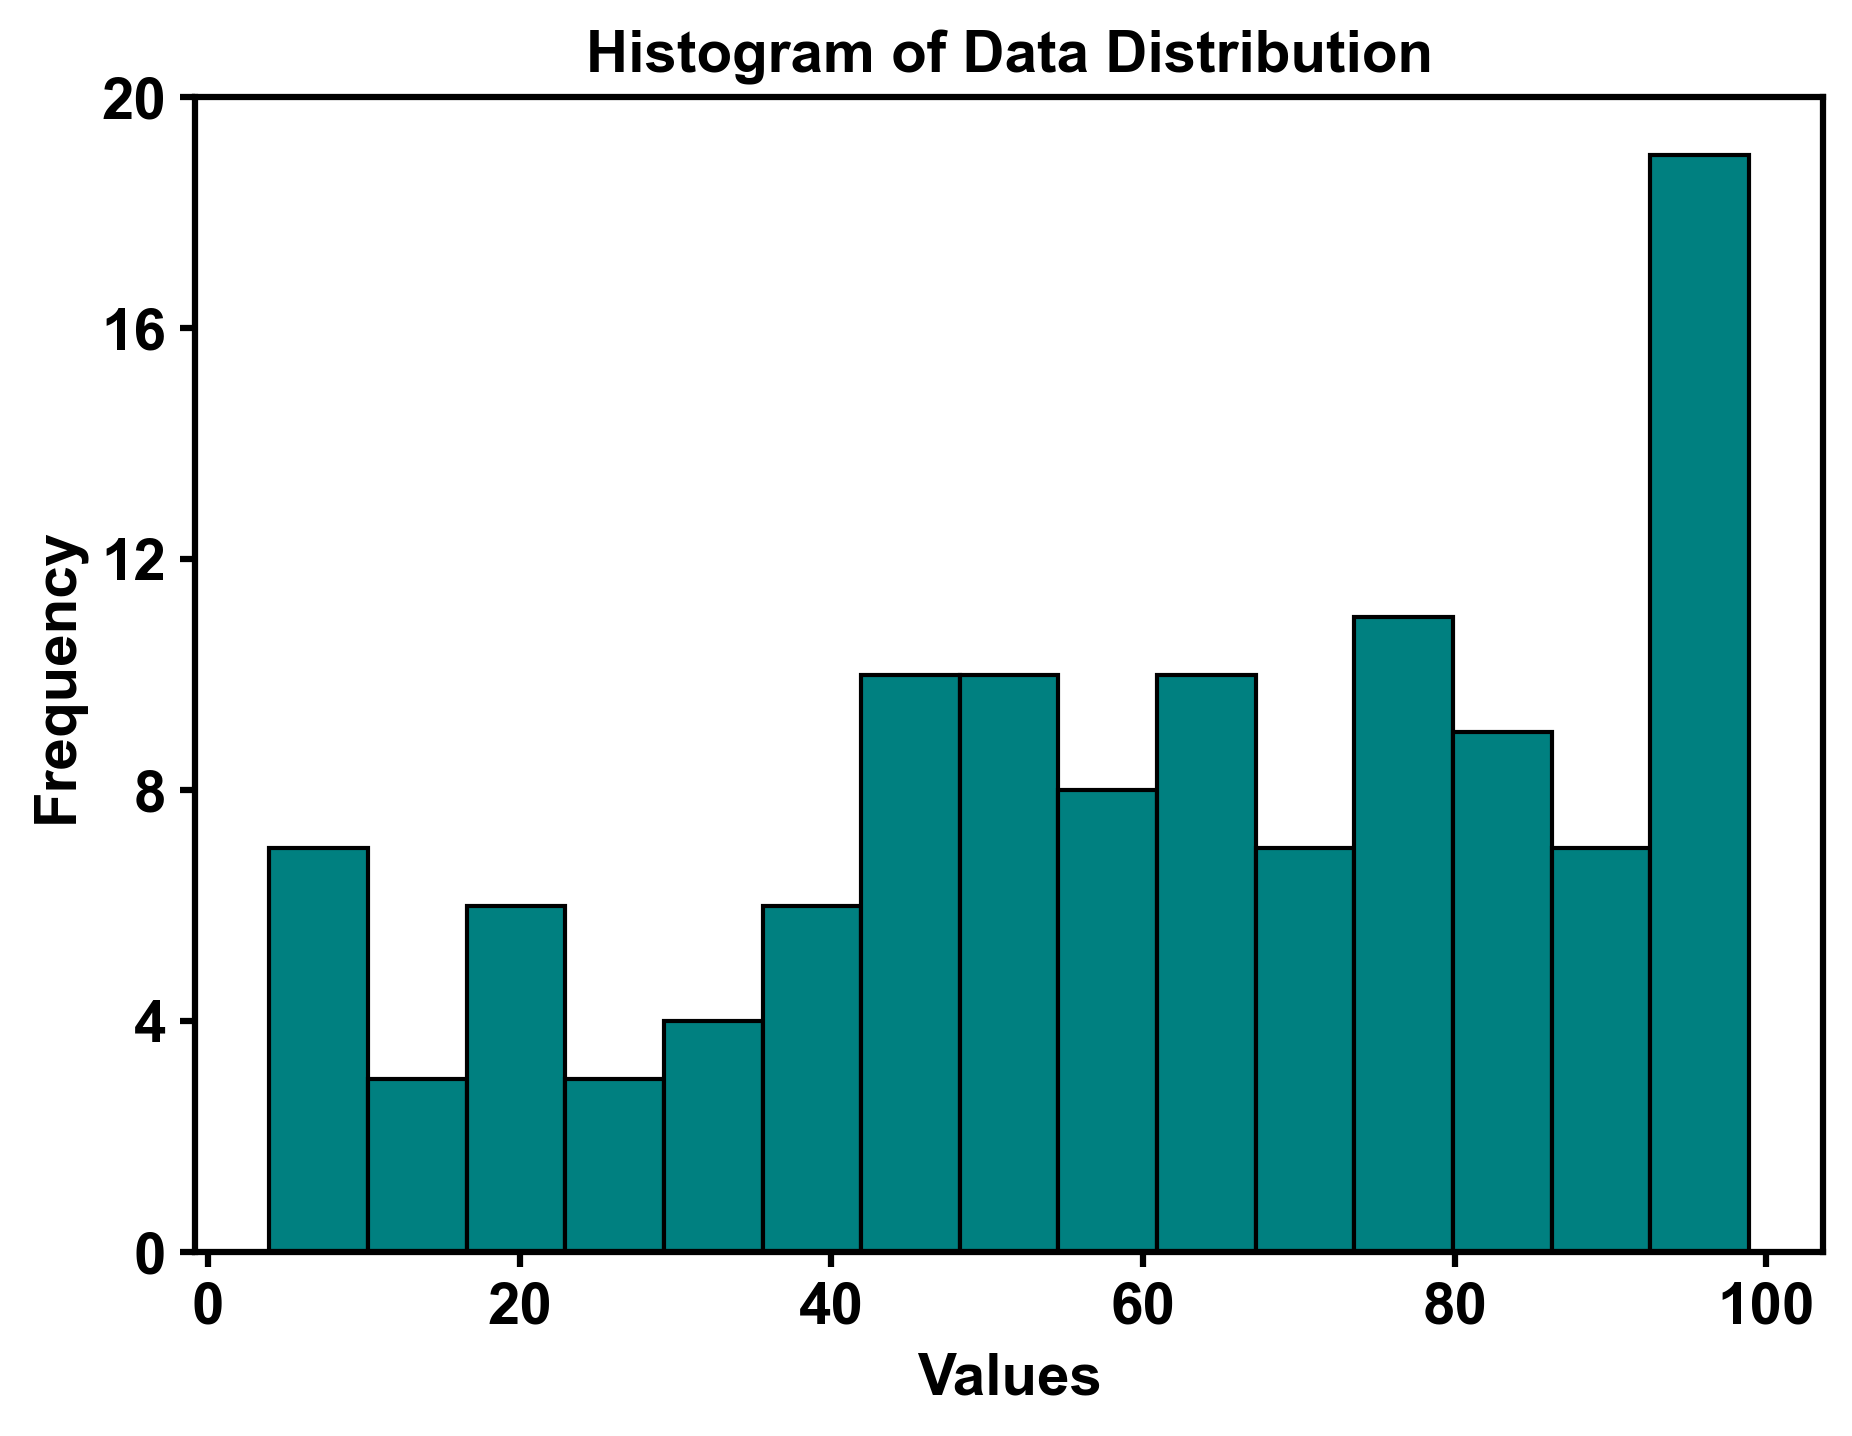

In [10]:

from matplotlib.font_manager import FontProperties
from matplotlib.ticker import MultipleLocator


fig = plt.figure(figsize=(7, 5), dpi=300)

plt.hist(data, bins=15, edgecolor='black', color='teal')
plt.title('Histogram of Data Distribution', fontsize=14, fontname='Arial', fontweight='bold')  
plt.xlabel('Values', fontsize=14, fontname='Arial', fontweight='bold') 
plt.ylabel('Frequency', fontsize=14, fontname='Arial', fontweight='bold')  


plt.gca().spines['top'].set_linewidth(1.5)
plt.gca().spines['bottom'].set_linewidth(1.5)
plt.gca().spines['left'].set_linewidth(1.5)
plt.gca().spines['right'].set_linewidth(1.5)


plt.tick_params(axis='both', which='both', width=1.5)


plt.xticks(fontsize=14, fontname='Arial', fontweight='bold')
plt.yticks(fontsize=14, fontname='Arial', fontweight='bold')




plt.ylim([0, 20])  
plt.gca().yaxis.set_major_locator(MultipleLocator(4)) 


plt.savefig('120histogram.png', bbox_inches='tight')


plt.show()


# GBR

In [11]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.metrics import r2_score
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor

GBR = GradientBoostingRegressor()
parameters= {
    'min_samples_leaf':list(range(1,10,2)),
    'n_estimators':list(range(1,40,2)),
    'max_depth':list(range(1,10,2))
}

grid = GridSearchCV(estimator=GradientBoostingRegressor(random_state=0) ,param_grid=parameters,n_jobs= -1,cv=5)
GBR_model = grid.fit(x_class_train,y_class_train)
best_parameters = grid.best_params_
print(best_parameters)


y_GBR_pre_train = GBR_model.predict(x_class_train)
y_GBR_pred = GBR_model.predict(x_class_test)

mae_train = mean_absolute_error(y_GBR_pre_train,y_class_train)
mse_train = mean_squared_error(y_GBR_pre_train,y_class_train)
R2_train = r2_score(y_class_train,y_GBR_pre_train)
print('training R2 = {:.3f} '.format(R2_train))
print('training mae = {:.3f} '.format(mae_train))
print('training mse = {:.3f} '.format(mse_train))
print('training RMSE = {:.3f} '.format(np.sqrt(mse_train)))

print()

mae_test = mean_absolute_error(y_GBR_pred,y_class_test)
mse_test = mean_squared_error(y_GBR_pred,y_class_test)
R2_test = r2_score(y_class_test,y_GBR_pred)
print('test R2 = {:.3f} '.format(R2_test))
print('test mae = {:.3f} '.format(mae_test))
print('test mse = {:.3f} '.format(mse_test))
print('test RMSE = {:.3f} '.format(np.sqrt(mse_test)))

{'max_depth': 9, 'min_samples_leaf': 5, 'n_estimators': 39}
training R2 = 0.894 
training mae = 6.031 
training mse = 71.519 
training RMSE = 8.457 

test R2 = 0.033 
test mae = 19.882 
test mse = 818.587 
test RMSE = 28.611 


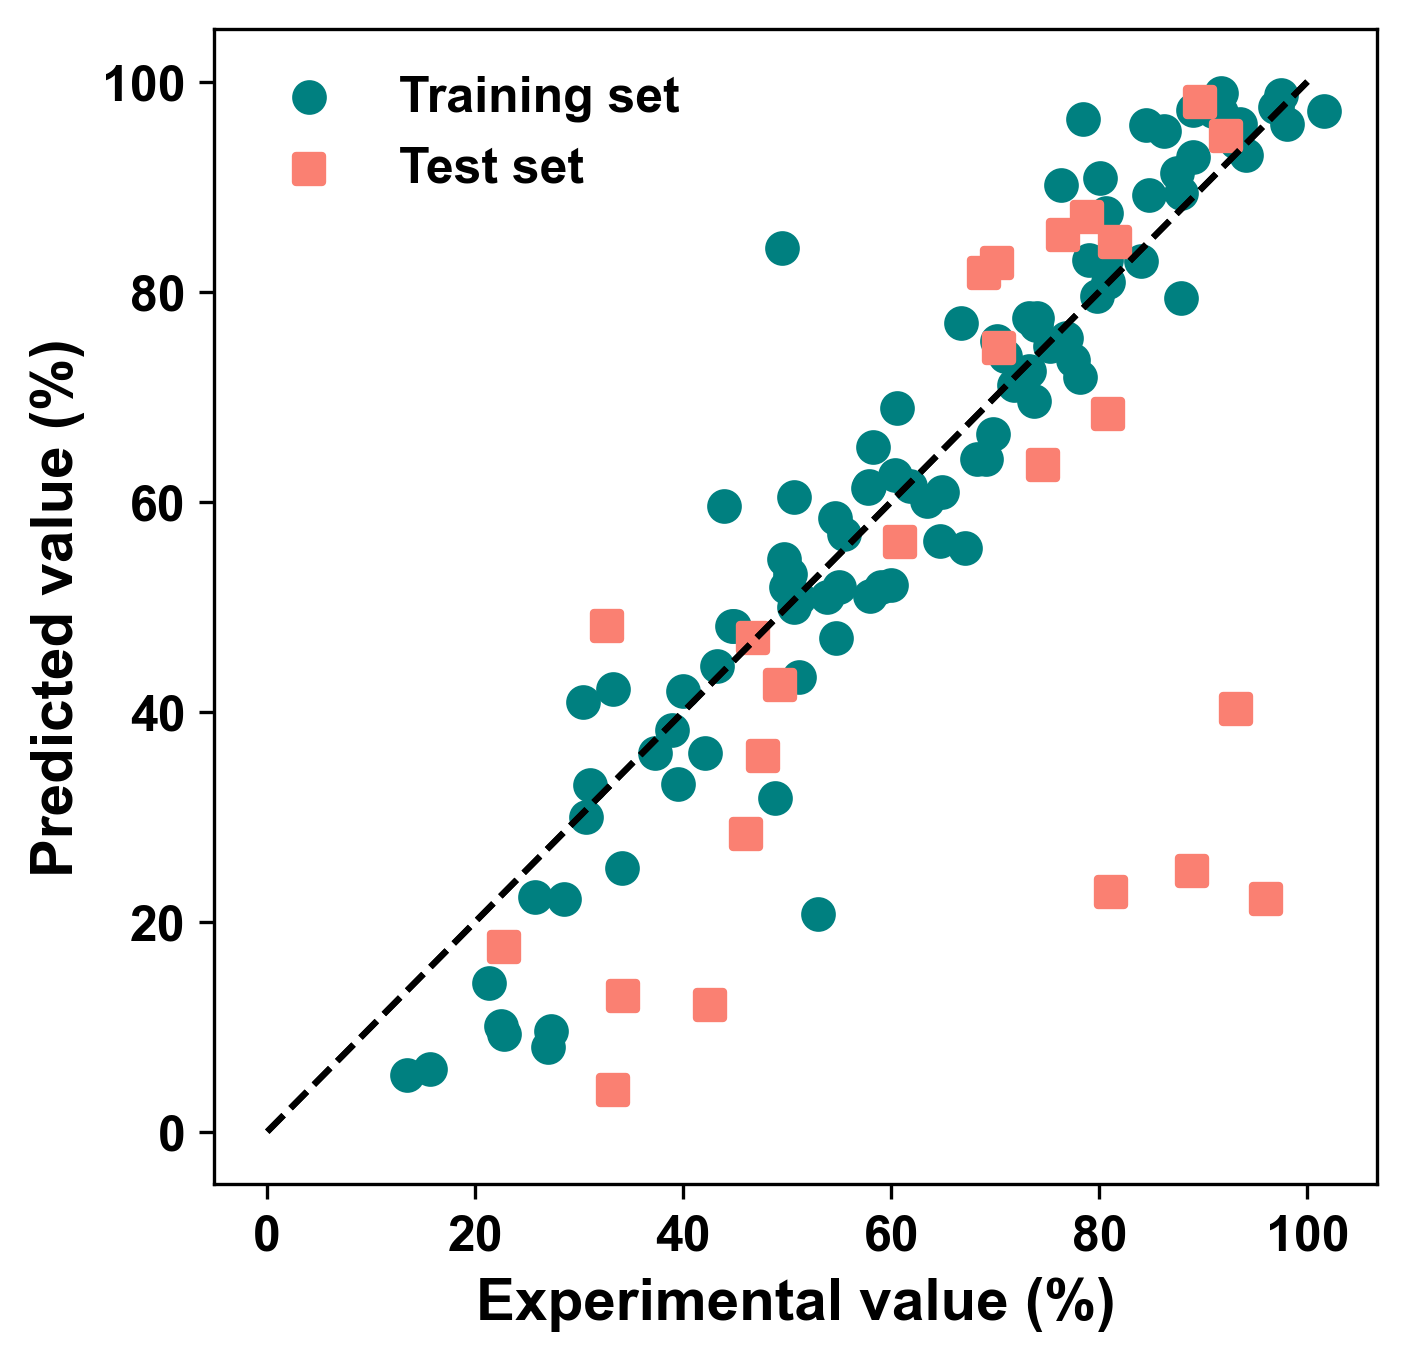

In [12]:
fig = plt.figure(figsize=(5,5),dpi=300)
plt.rc('font',family='Arial',weight= 'bold')

plt.scatter(y_GBR_pre_train, y_class_train, alpha=1, marker='o', s=40, color='teal', label='Training set', linewidth=2)
plt.scatter(y_GBR_pred,y_class_test, alpha=1, marker='s', s=40, color='salmon', label='Test set', linewidth=2)
plt.plot([0, 100], [0, 100], c='black', ls='--')

plt.plot([0, 100], [0, 100], c='black', ls='--')

plt.ylabel("Predicted value (%)", weight='bold', fontsize=14)
plt.xlabel("Experimental value (%)", weight='bold', fontsize=14)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(frameon=False, fontsize=12)



plt.savefig('GBR.PNG', format='PNG')
plt.show()
import matplotlib.pyplot as plt

## train

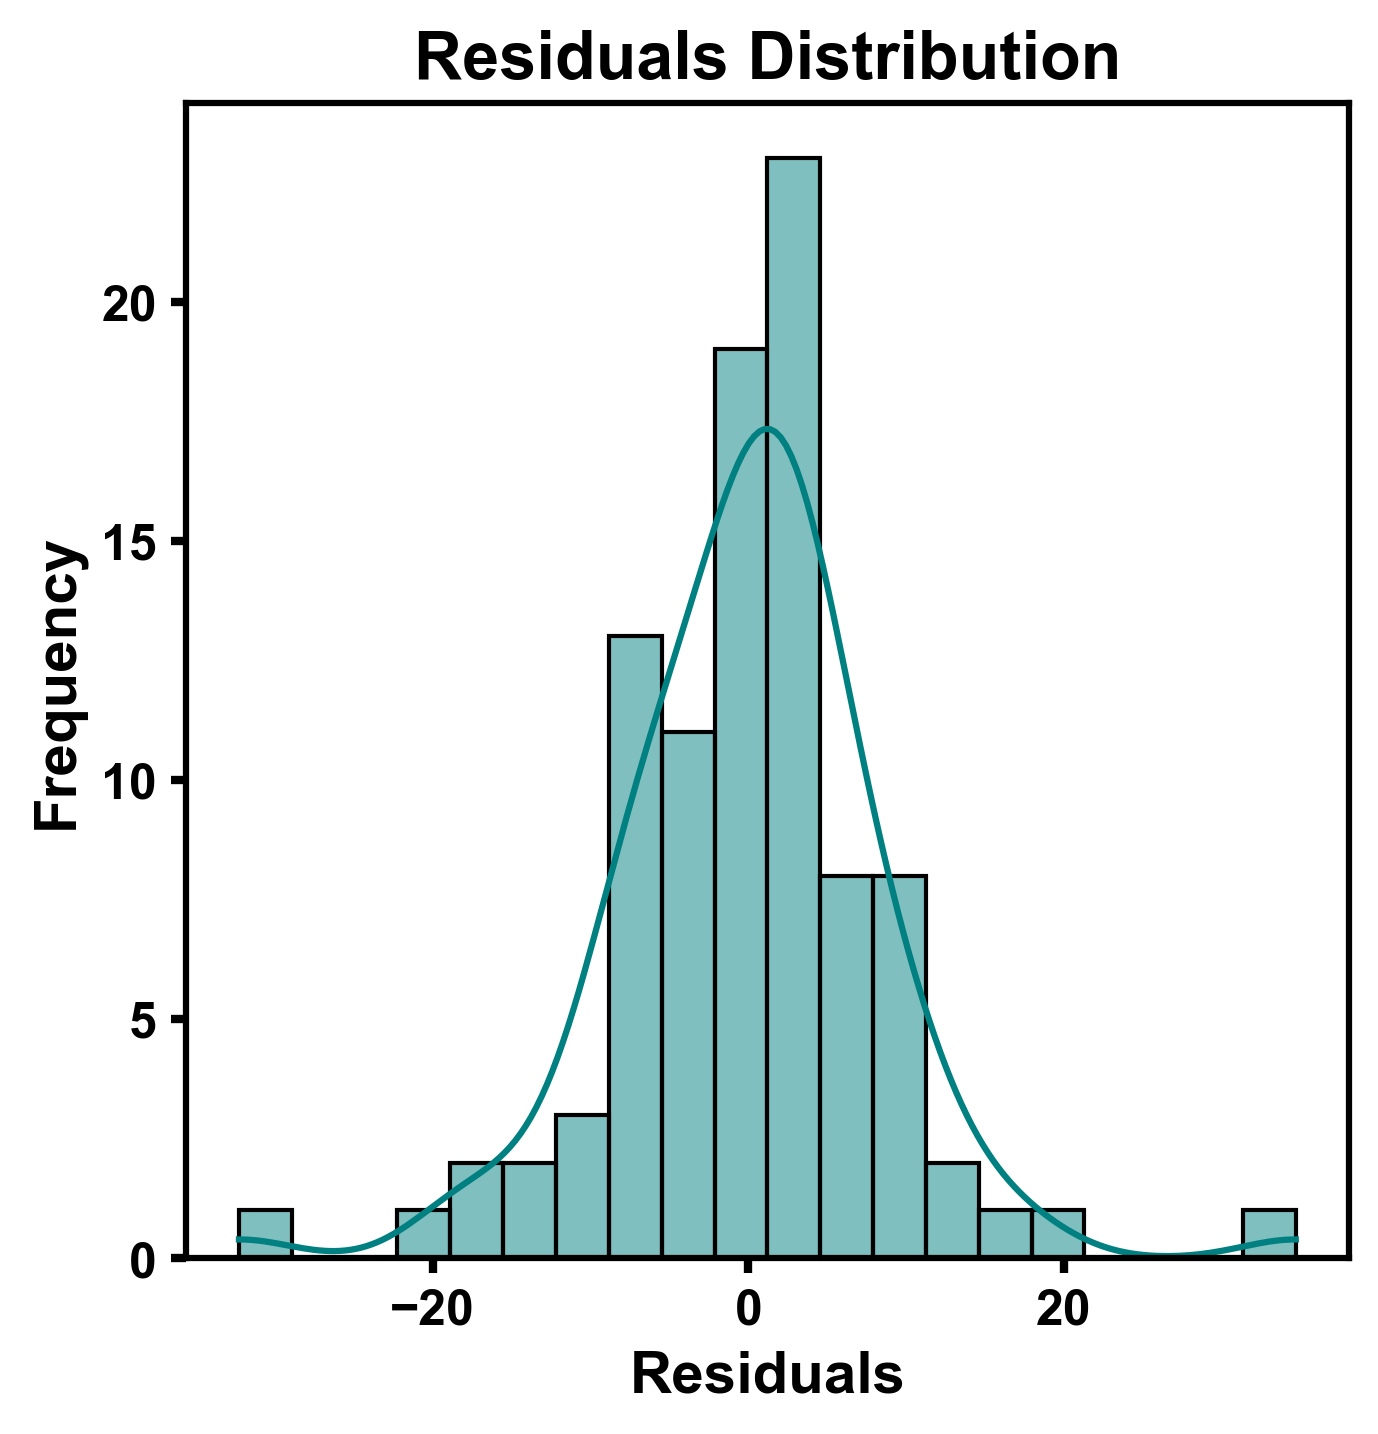

In [13]:

from matplotlib.font_manager import FontProperties


residuals = y_class_train - y_GBR_pre_train


fig, ax = plt.subplots(figsize=(5, 5), dpi=300)
sns.histplot(residuals, kde=True, color='teal', bins=20, ax=ax)


ax.spines['top'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['left'].set_linewidth(1.5)
ax.spines['right'].set_linewidth(1.5)

ax.tick_params(axis='both', which='both', width=2)


ax.tick_params(axis='both', labelsize=12)


ax.set_xlabel('Residuals', fontsize=14, fontname='Arial', fontweight='bold')
ax.set_ylabel('Frequency', fontsize=14, fontname='Arial', fontweight='bold')


ax.set_title('Residuals Distribution', fontsize=16, fontname='Arial', fontweight='bold')

plt.savefig('GBR1.PNG', format='PNG')
plt.show()
import matplotlib.pyplot as plt
plt.show()


## test

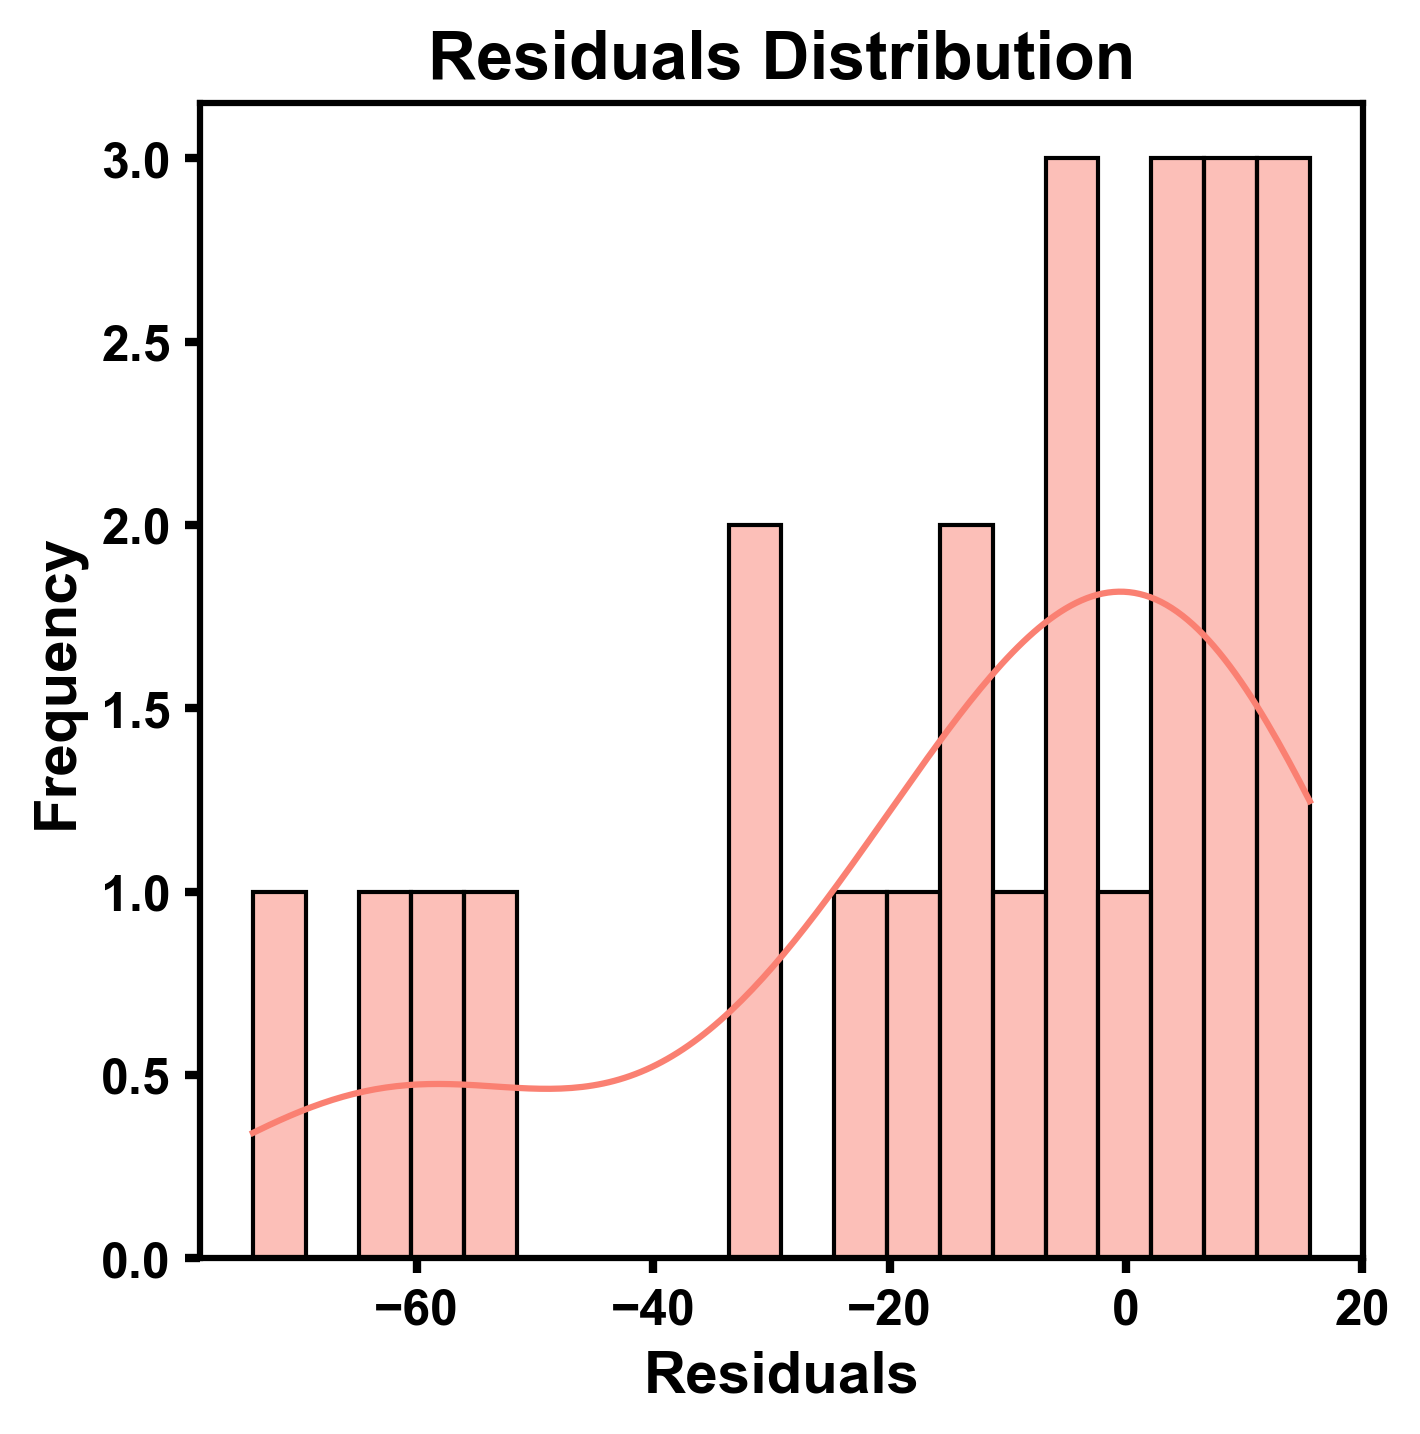

In [14]:

from matplotlib.font_manager import FontProperties


residuals =y_class_test - y_GBR_pred


fig, ax = plt.subplots(figsize=(5, 5), dpi=300)
sns.histplot(residuals, kde=True, color='salmon', bins=20, ax=ax)


ax.spines['top'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['left'].set_linewidth(1.5)
ax.spines['right'].set_linewidth(1.5)


ax.tick_params(axis='both', which='both', width=2)


ax.tick_params(axis='both', labelsize=12)


ax.set_xlabel('Residuals', fontsize=14, fontname='Arial', fontweight='bold')
ax.set_ylabel('Frequency', fontsize=14, fontname='Arial', fontweight='bold')


ax.set_title('Residuals Distribution', fontsize=16, fontname='Arial', fontweight='bold')

plt.savefig('GBR2.PNG', format='PNG')
plt.show()
import matplotlib.pyplot as plt
plt.show()


# ExtraTrees

In [15]:
from sklearn.ensemble import ExtraTreesRegressor

etr = ExtraTreesRegressor()


parameters= {
    'min_samples_leaf':list(range(1,10,2)),
    'n_estimators':list(range(1,30,2)),
    'max_depth':list(range(1,20,2))
}

grid = GridSearchCV(estimator=ExtraTreesRegressor(random_state=0) ,param_grid=parameters,n_jobs= -1,cv=5)
etr_model = grid.fit(x_class_train,y_class_train)
best_parameters = grid.best_params_
print(best_parameters)


y_etr_pre_train = etr_model.predict(x_class_train)
y_etr_pred = etr_model.predict(x_class_test)


mae_train = mean_absolute_error(y_etr_pre_train,y_class_train)
mse_train = mean_squared_error(y_etr_pre_train,y_class_train)
R2_train = r2_score(y_class_train,y_etr_pre_train)
print('training R2 = {:.3f} '.format(R2_train))
print('training mae = {:.3f} '.format(mae_train))
print('training mse = {:.3f} '.format(mse_train))
print('training RMSE = {:.3f}'.format(np.sqrt(mse_train)))

print()

mae_test = mean_absolute_error(y_etr_pred,y_class_test)
mse_test = mean_squared_error(y_etr_pred,y_class_test)
R2_test = r2_score(y_class_test,y_etr_pred)
print('test R2 = {:.3f} '.format(R2_test))
print('test mae = {:.3f} '.format(mae_test))
print('test mse = {:.3f} '.format(mse_test))
print('test RMSE = {:.3f} '.format(np.sqrt(mse_test)))

{'max_depth': 9, 'min_samples_leaf': 1, 'n_estimators': 21}
training R2 = 0.996 
training mae = 0.841 
training mse = 2.683 
training RMSE = 1.638

test R2 = 0.134 
test mae = 20.096 
test mse = 732.760 
test RMSE = 27.070 


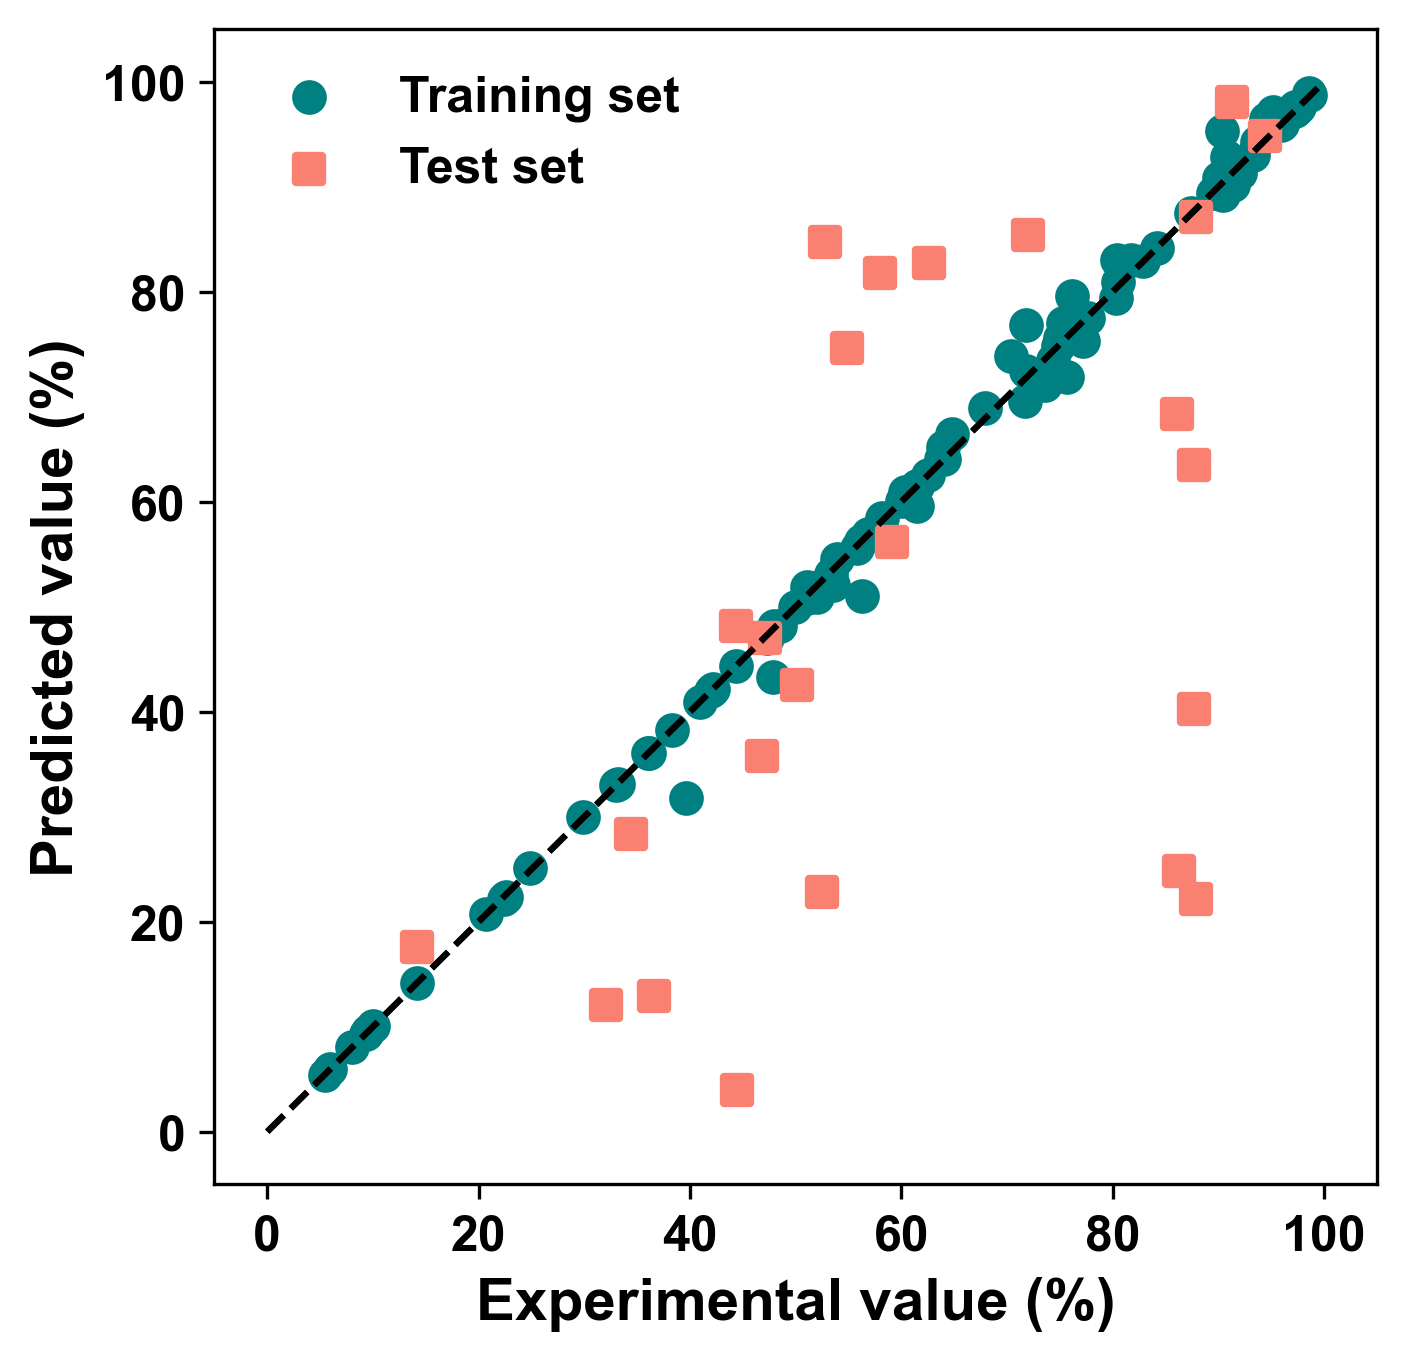

In [16]:
fig = plt.figure(figsize=(5,5),dpi=300)
plt.rc('font',family='Arial',weight= 'bold')
plt.scatter(y_etr_pre_train,y_class_train, alpha=1, marker='o', s=40, color='teal', label='Training set', linewidth=2)
plt.scatter(y_etr_pred,y_class_test, alpha=1, marker='s', s=40, color='salmon', label='Test set', linewidth=2)
plt.plot([0, 100], [0, 100], c='black', ls='--')

plt.plot([0, 100], [0, 100], c='black', ls='--')

plt.ylabel("Predicted value (%)", weight='bold', fontsize=14)
plt.xlabel("Experimental value (%)", weight='bold', fontsize=14)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(frameon=False, fontsize=12)


plt.savefig('etr.PNG', format='PNG')
plt.show()
import matplotlib.pyplot as plt


## train

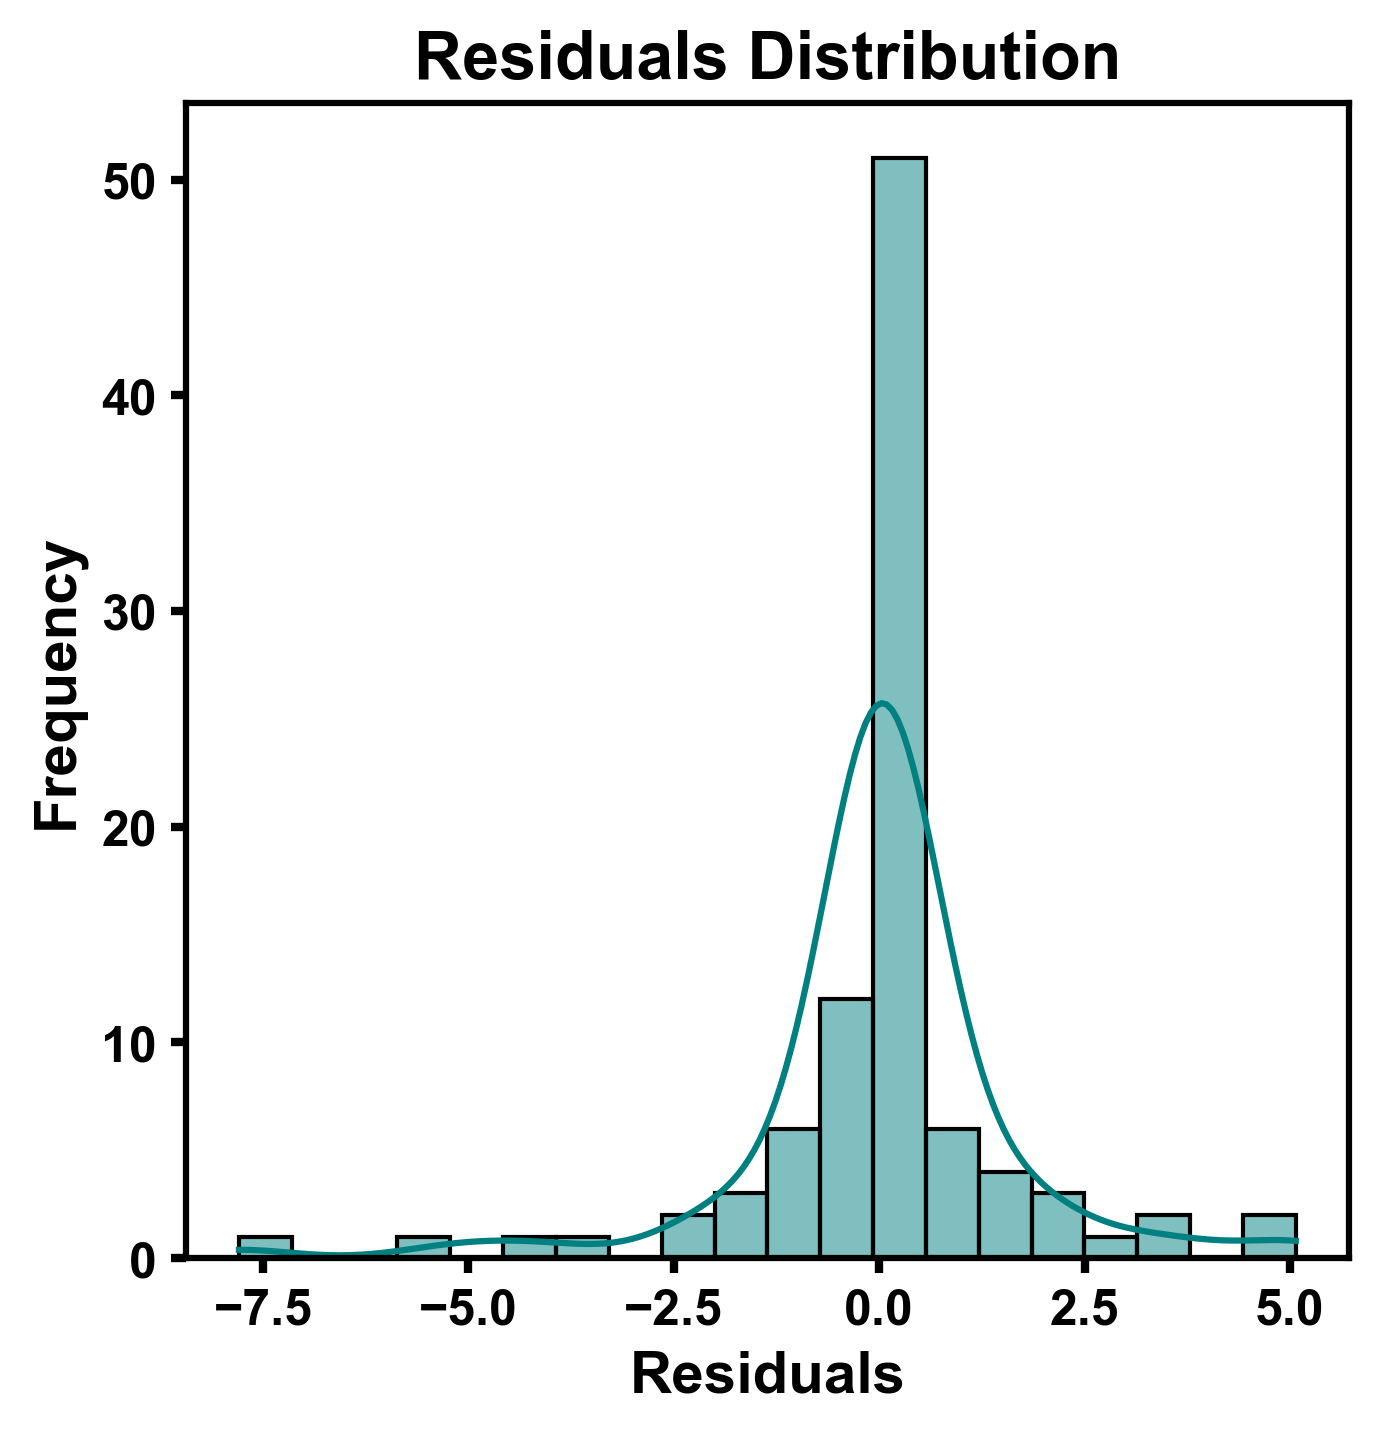

In [17]:


from matplotlib.font_manager import FontProperties


residuals =y_class_train - y_etr_pre_train


fig, ax = plt.subplots(figsize=(5, 5), dpi=300)
sns.histplot(residuals, kde=True, color='teal', bins=20, ax=ax)


ax.spines['top'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['left'].set_linewidth(1.5)
ax.spines['right'].set_linewidth(1.5)


ax.tick_params(axis='both', which='both', width=2)


ax.tick_params(axis='both', labelsize=12)


ax.set_xlabel('Residuals', fontsize=14, fontname='Arial', fontweight='bold')
ax.set_ylabel('Frequency', fontsize=14, fontname='Arial', fontweight='bold')


ax.set_title('Residuals Distribution', fontsize=16, fontname='Arial', fontweight='bold')
plt.savefig('etr1.PNG', format='PNG')
plt.show()
plt.show()


## test

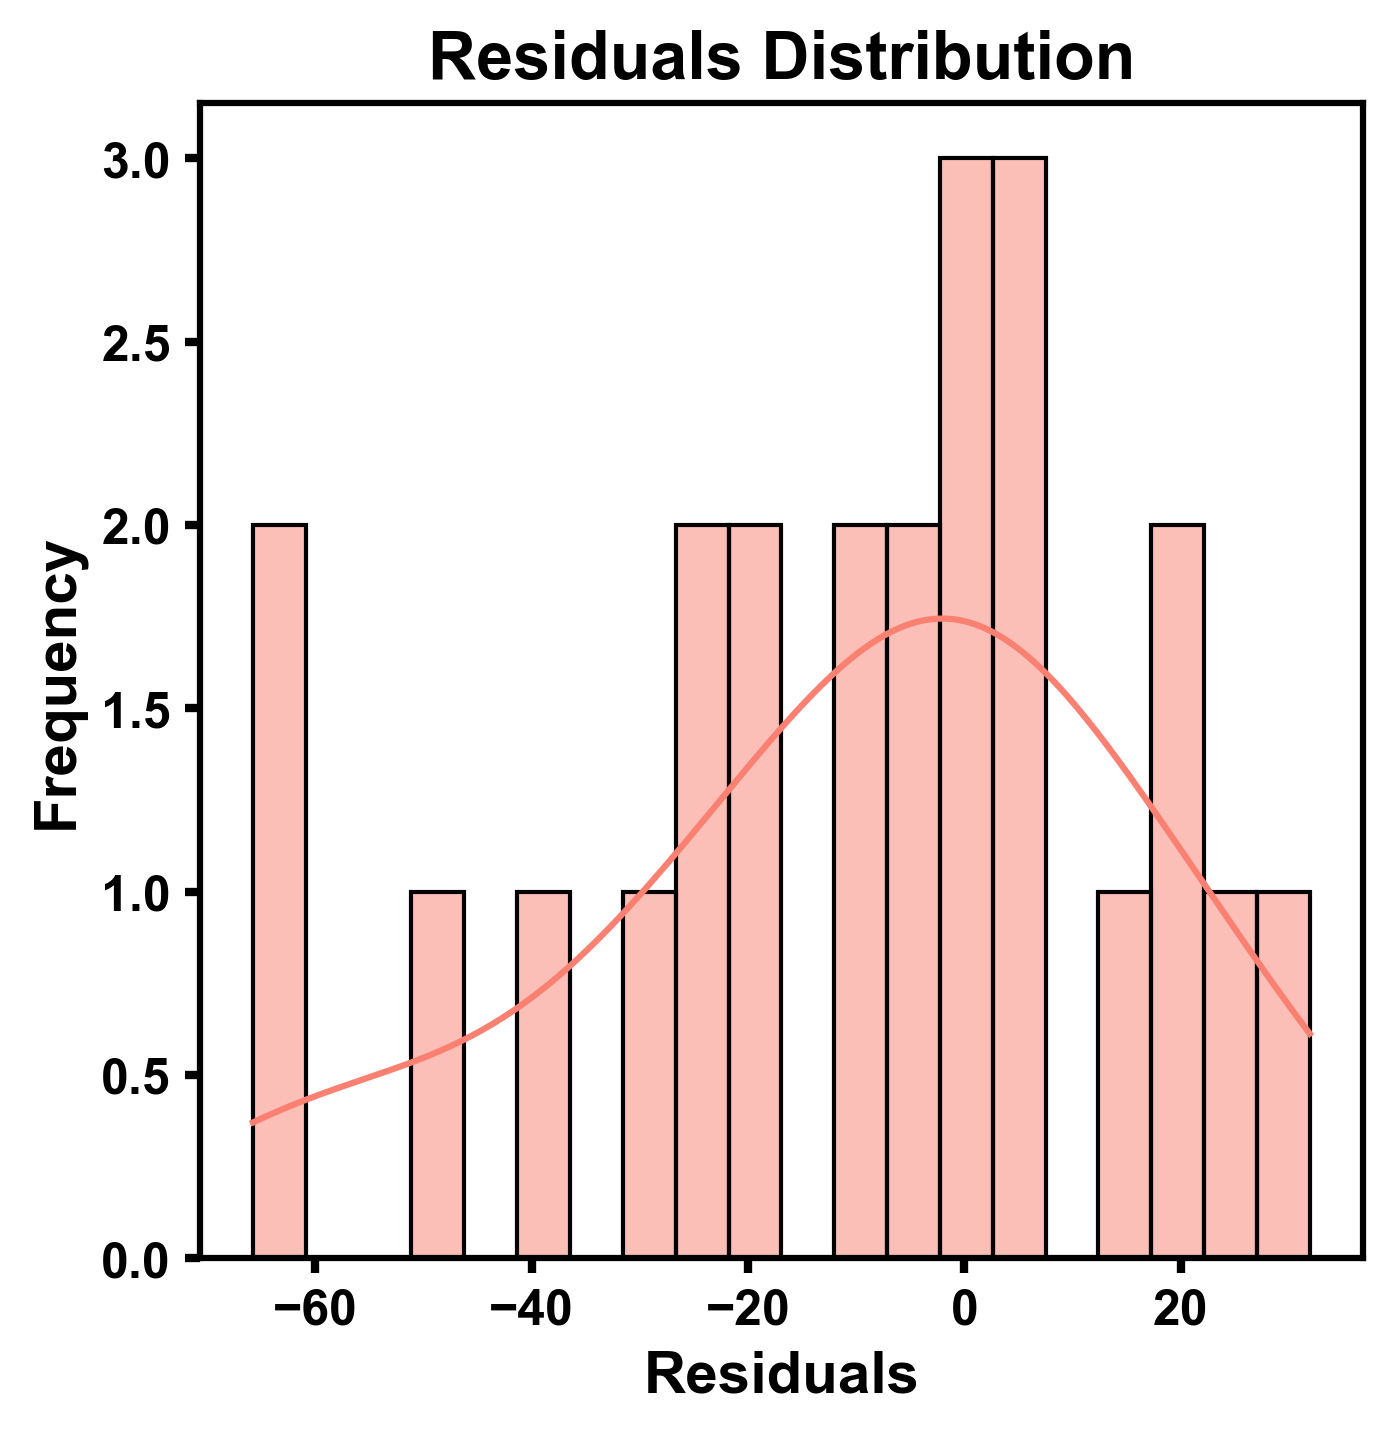

In [18]:

from matplotlib.font_manager import FontProperties


residuals =y_class_test - y_etr_pred


fig, ax = plt.subplots(figsize=(5, 5), dpi=300)
sns.histplot(residuals, kde=True, color='salmon', bins=20, ax=ax)


ax.spines['top'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['left'].set_linewidth(1.5)
ax.spines['right'].set_linewidth(1.5)


ax.tick_params(axis='both', which='both', width=2)


ax.tick_params(axis='both', labelsize=12)


ax.set_xlabel('Residuals', fontsize=14, fontname='Arial', fontweight='bold')
ax.set_ylabel('Frequency', fontsize=14, fontname='Arial', fontweight='bold')


ax.set_title('Residuals Distribution', fontsize=16, fontname='Arial', fontweight='bold')
plt.savefig('etr2.PNG', format='PNG')
plt.show()
plt.show()


# AdaBoost

In [19]:
from sklearn.ensemble import AdaBoostRegressor

ada = AdaBoostRegressor()

parameters= {
    
    'n_estimators':list(range(1,80,2)),
}

grid = GridSearchCV(estimator=AdaBoostRegressor(random_state=55) ,param_grid=parameters,n_jobs= -1,cv=10)
ada_model = grid.fit(x_class_train,y_class_train)
best_parameters = grid.best_params_
print(best_parameters)


y_ada_pre_train = ada_model.predict(x_class_train)
y_ada_pred = ada_model.predict(x_class_test)


mae_train = mean_absolute_error(y_ada_pre_train,y_class_train)
mse_train = mean_squared_error(y_ada_pre_train,y_class_train)
R2_train = r2_score(y_class_train,y_ada_pre_train)
print('training R2 = {:.3f} '.format(R2_train))
print('training mae = {:.3f}'.format(mae_train))
print('training mse = {:.3f} '.format(mse_train))
print('training RMSE = {:.3f} '.format(np.sqrt(mse_train)))

print()

mae_test = mean_absolute_error(y_ada_pred,y_class_test)
mse_test = mean_squared_error(y_ada_pred,y_class_test)
R2_test = r2_score(y_class_test,y_ada_pred)
print('test R2 = {:.3f}'.format(R2_test))
print('test mae = {:.3f} '.format(mae_test))
print('test mse = {:.3f}'.format(mse_test))
print('test RMSE = {:.3f} '.format(np.sqrt(mse_test)))

{'n_estimators': 43}
training R2 = 0.818 
training mae = 9.688
training mse = 123.166 
training RMSE = 11.098 

test R2 = 0.050
test mae = 21.242 
test mse = 804.134
test RMSE = 28.357 


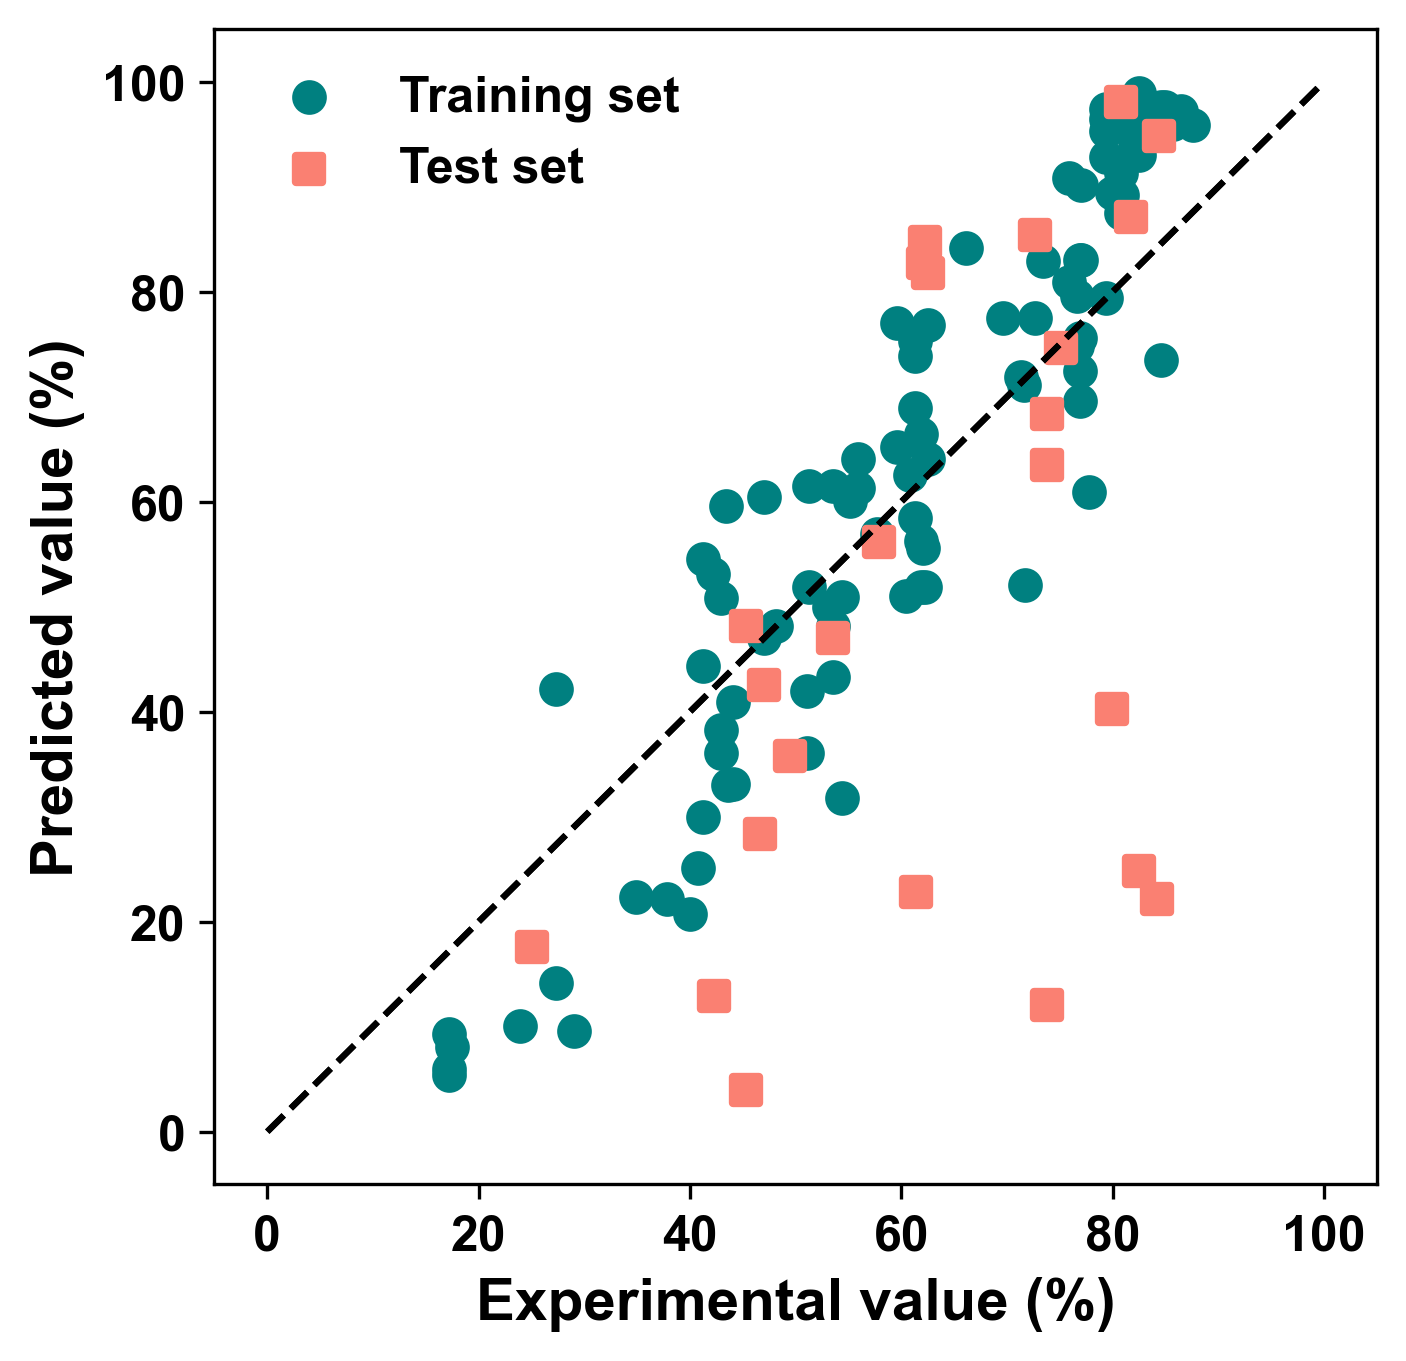

In [20]:

fig = plt.figure(figsize=(5,5),dpi=300)
plt.rc('font',family='Arial',weight= 'bold')
plt.scatter(y_ada_pre_train,y_class_train, alpha=1, marker='o', s=40, color='teal', label='Training set', linewidth=2)
plt.scatter(y_ada_pred,y_class_test, alpha=1, marker='s', s=40, color='salmon', label='Test set', linewidth=2)
plt.plot([0, 100], [0, 100], c='black', ls='--')

plt.plot([0, 100], [0, 100], c='black', ls='--')

plt.ylabel("Predicted value (%)", weight='bold', fontsize=14)
plt.xlabel("Experimental value (%)", weight='bold', fontsize=14)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(frameon=False, fontsize=12)


plt.savefig('ada.PNG', format='PNG')
plt.show()
import matplotlib.pyplot as plt


## train

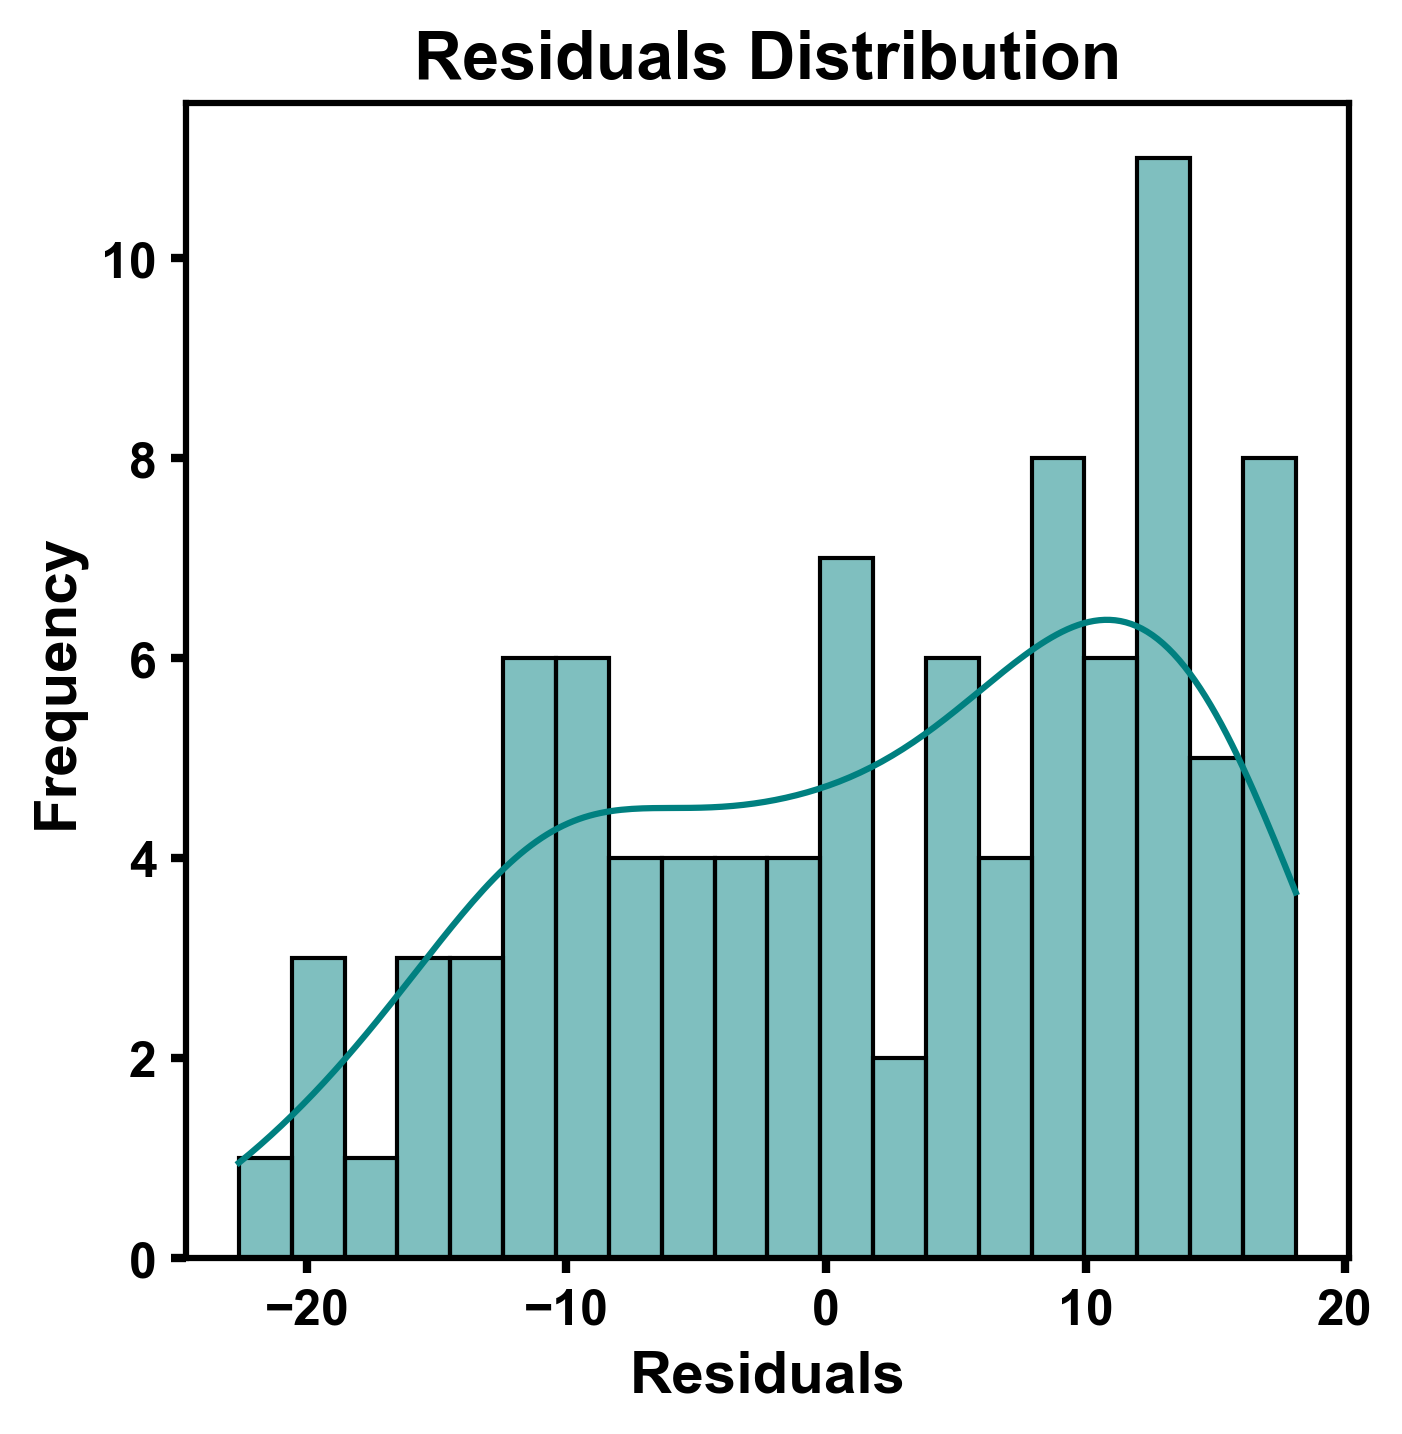

In [21]:

from matplotlib.font_manager import FontProperties


residuals =y_class_train - y_ada_pre_train


fig, ax = plt.subplots(figsize=(5, 5), dpi=300)
sns.histplot(residuals, kde=True, color='teal', bins=20, ax=ax)


ax.spines['top'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['left'].set_linewidth(1.5)
ax.spines['right'].set_linewidth(1.5)


ax.tick_params(axis='both', which='both', width=2)


ax.tick_params(axis='both', labelsize=12)


ax.set_xlabel('Residuals', fontsize=14, fontname='Arial', fontweight='bold')
ax.set_ylabel('Frequency', fontsize=14, fontname='Arial', fontweight='bold')


ax.set_title('Residuals Distribution', fontsize=16, fontname='Arial', fontweight='bold')
plt.savefig('ada1.PNG', format='PNG')
plt.show()
plt.show()


## test

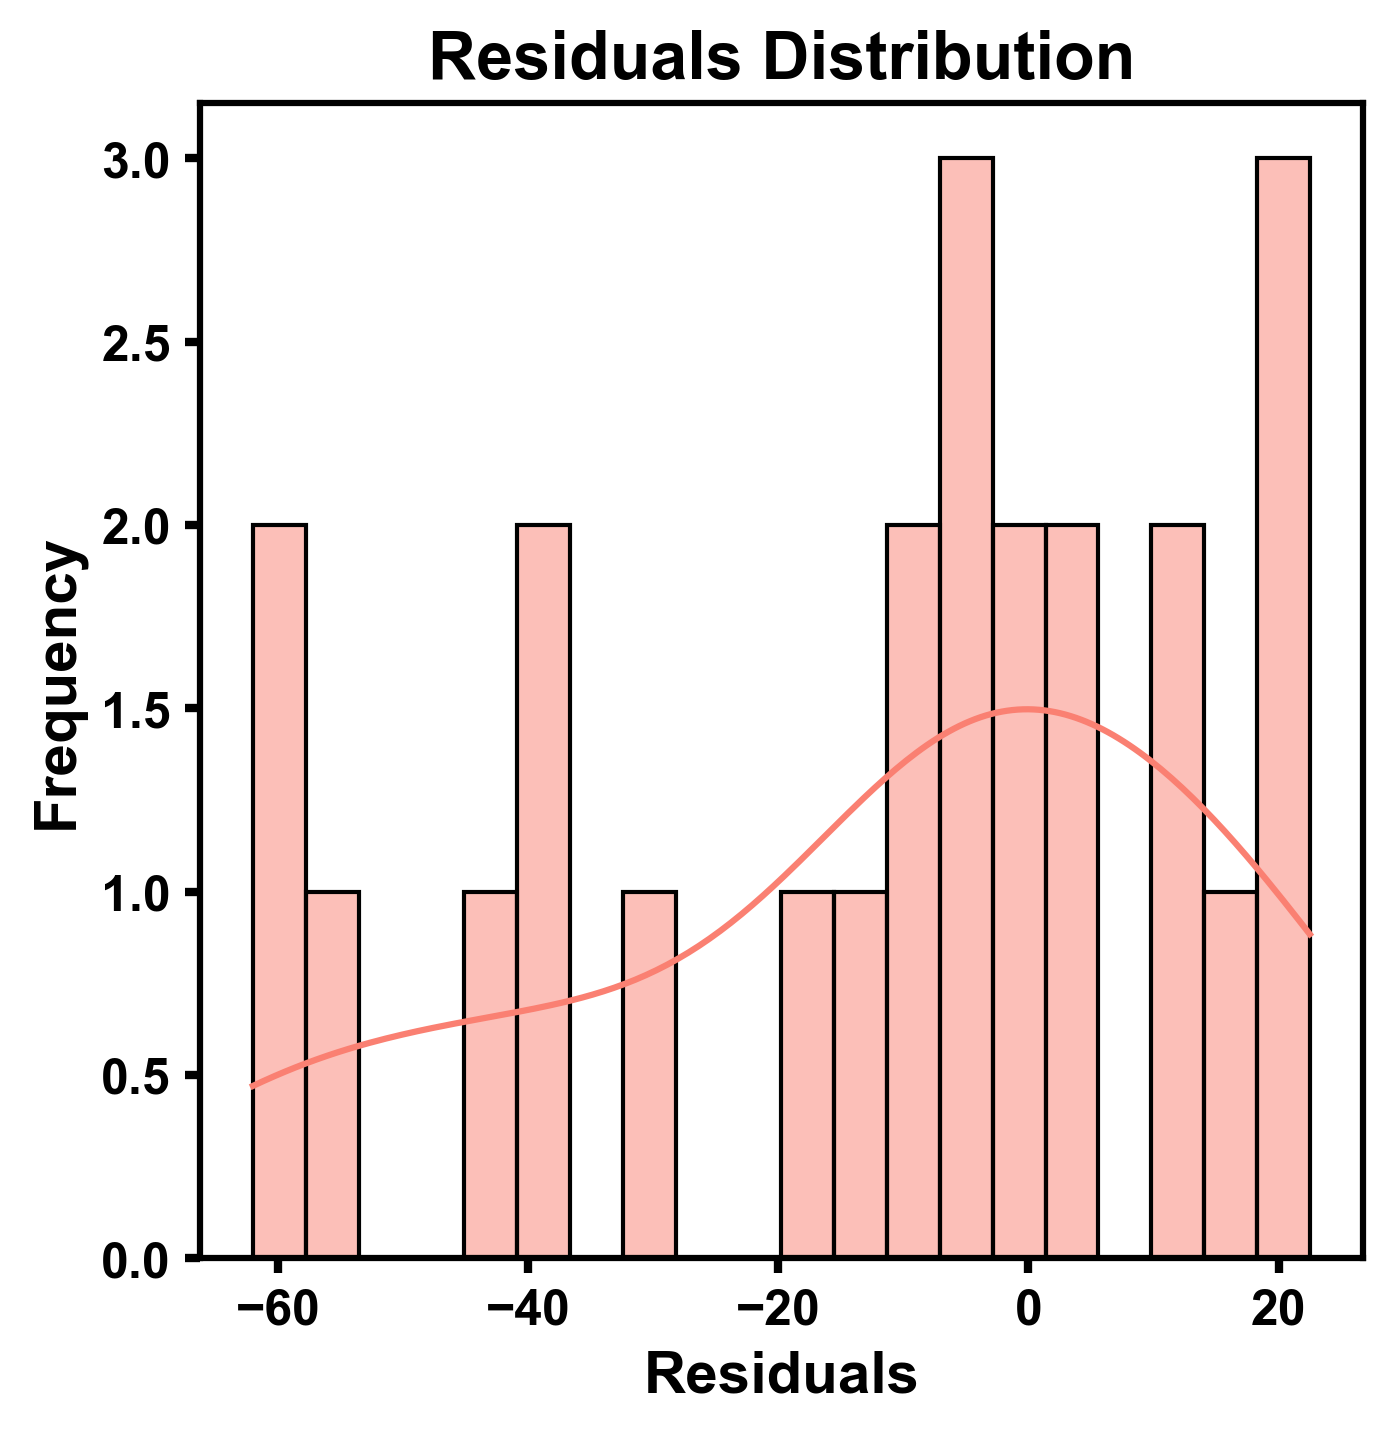

In [22]:

from matplotlib.font_manager import FontProperties


residuals =y_class_test - y_ada_pred


fig, ax = plt.subplots(figsize=(5, 5), dpi=300)
sns.histplot(residuals, kde=True, color='salmon', bins=20, ax=ax)


ax.spines['top'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['left'].set_linewidth(1.5)
ax.spines['right'].set_linewidth(1.5)


ax.tick_params(axis='both', which='both', width=2)


ax.tick_params(axis='both', labelsize=12)


ax.set_xlabel('Residuals', fontsize=14, fontname='Arial', fontweight='bold')
ax.set_ylabel('Frequency', fontsize=14, fontname='Arial', fontweight='bold')


ax.set_title('Residuals Distribution', fontsize=16, fontname='Arial', fontweight='bold')
plt.savefig('ada2.PNG', format='PNG')
plt.show()
plt.show()


# RandomForest

In [23]:
from sklearn.ensemble import RandomForestRegressor

RFR = RandomForestRegressor(random_state=2)
parameters= {
    'n_estimators':list(range(1,30,2)),
}
grid = GridSearchCV(estimator=RandomForestRegressor(random_state=5) ,param_grid=parameters,n_jobs= -1,cv=10)
RFR_model = grid.fit(x_class_train,y_class_train)
best_parameters = RFR_model.best_params_
print(best_parameters)
RFR_model = RFR.fit(x_class_train,y_class_train)

y_RFR_pre_train = RFR_model.predict(x_class_train)
y_RFR_pred = RFR_model.predict(x_class_test)


mae_train = mean_absolute_error(y_RFR_pre_train,y_class_train)
mse_train = mean_squared_error(y_RFR_pre_train,y_class_train)
R2_train = r2_score(y_class_train,y_RFR_pre_train)
print('training R2 = {:.4f} '.format(R2_train))
print('training mae = {:.3f} '.format(mae_train))
print('training mse = {:.3f} '.format(mse_train))
print('training RMSE = {:.3f} '.format(np.sqrt(mse_train)))

print()

mae_test = mean_absolute_error(y_RFR_pred,y_class_test)
mse_test = mean_squared_error(y_RFR_pred,y_class_test)
R2_test = r2_score(y_class_test,y_RFR_pred)
print('test R2 = {:.3f} '.format(R2_test))
print('test mae = {:.3f} '.format(mae_test))
print('test mse = {:.3f} '.format(mse_test))
print('test RMSE = {:.3f} '.format(np.sqrt(mse_test)))

{'n_estimators': 7}
training R2 = 0.9324 
training mae = 4.705 
training mse = 45.663 
training RMSE = 6.757 

test R2 = 0.161 
test mae = 19.436 
test mse = 709.643 
test RMSE = 26.639 


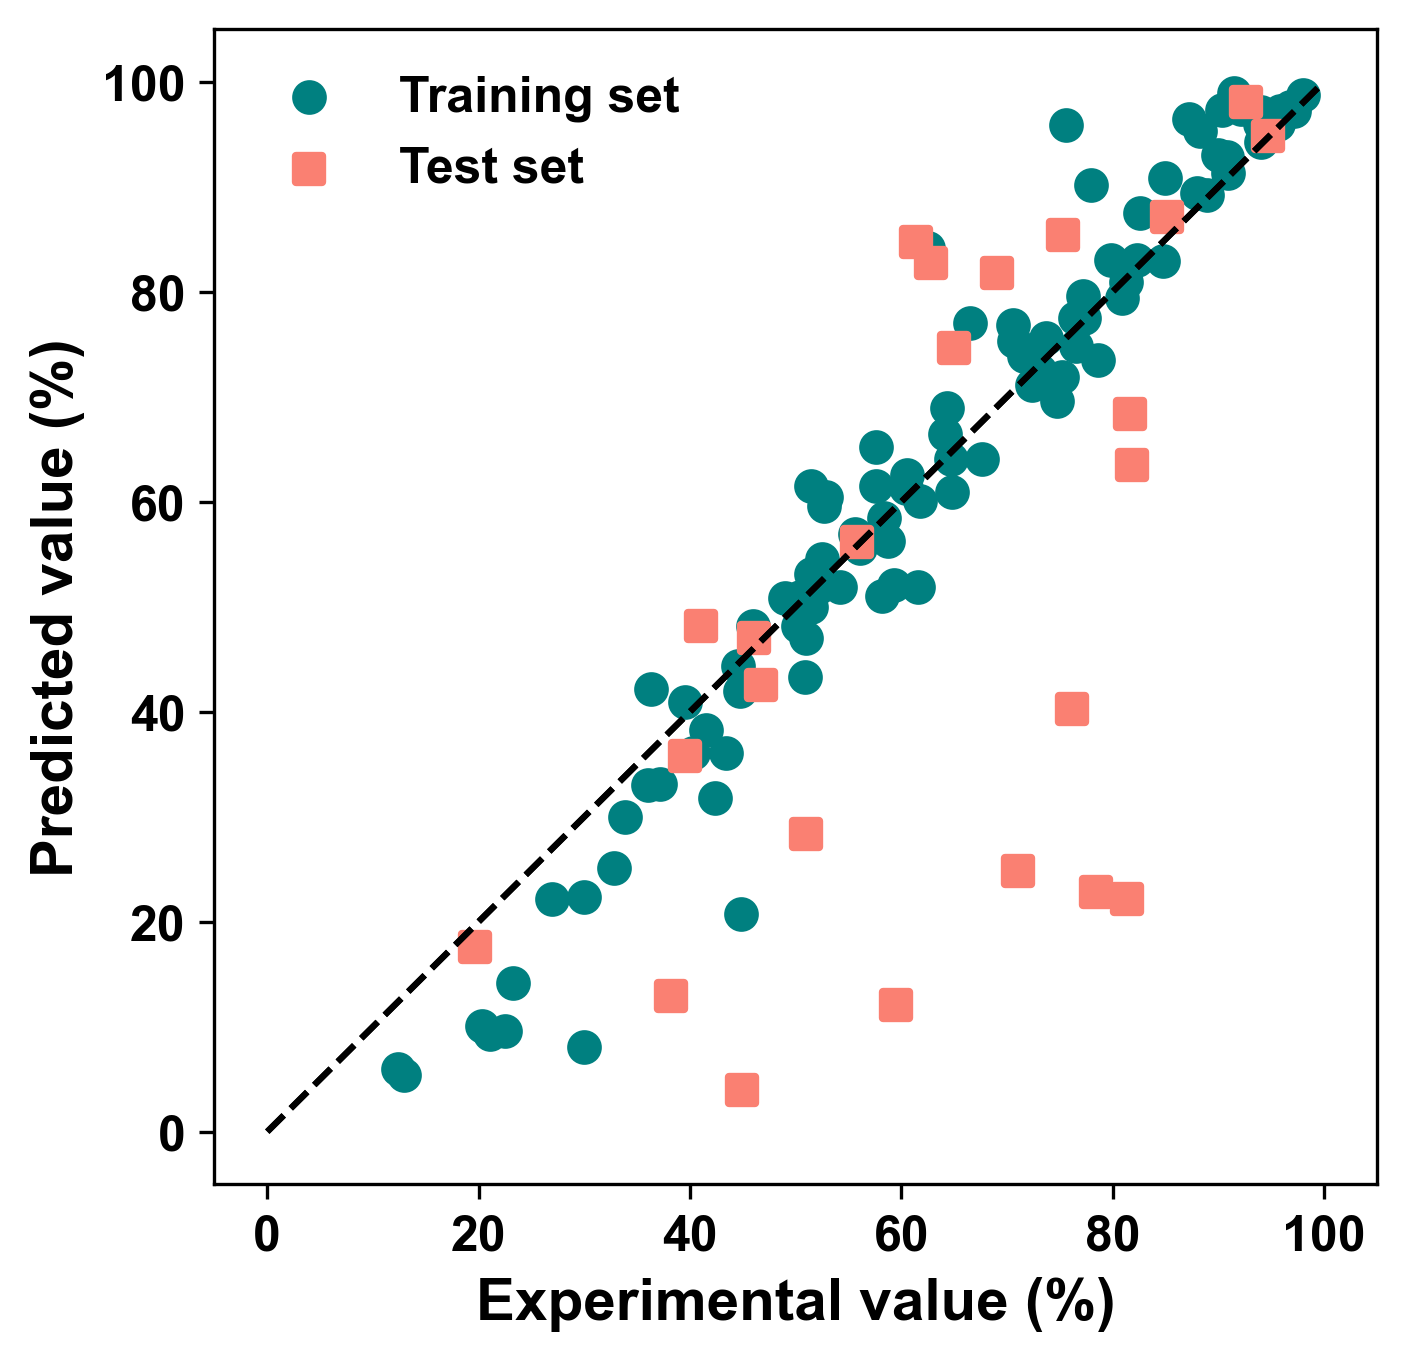

In [24]:

fig = plt.figure(figsize=(5,5),dpi=300)
plt.rc('font',family='Arial',weight= 'bold')
plt.scatter(y_RFR_pre_train,y_class_train, alpha=1, marker='o', s=40, color='teal', label='Training set', linewidth=2)
plt.scatter(y_RFR_pred,y_class_test, alpha=1, marker='s', s=40, color='salmon', label='Test set', linewidth=2)
plt.plot([0, 100], [0, 100], c='black', ls='--')

plt.plot([0, 100], [0, 100], c='black', ls='--')

plt.ylabel("Predicted value (%)", weight='bold', fontsize=14)
plt.xlabel("Experimental value (%)", weight='bold', fontsize=14)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(frameon=False, fontsize=12)


plt.savefig('RFR.PNG', format='PNG')
plt.show()
import matplotlib.pyplot as plt


## train

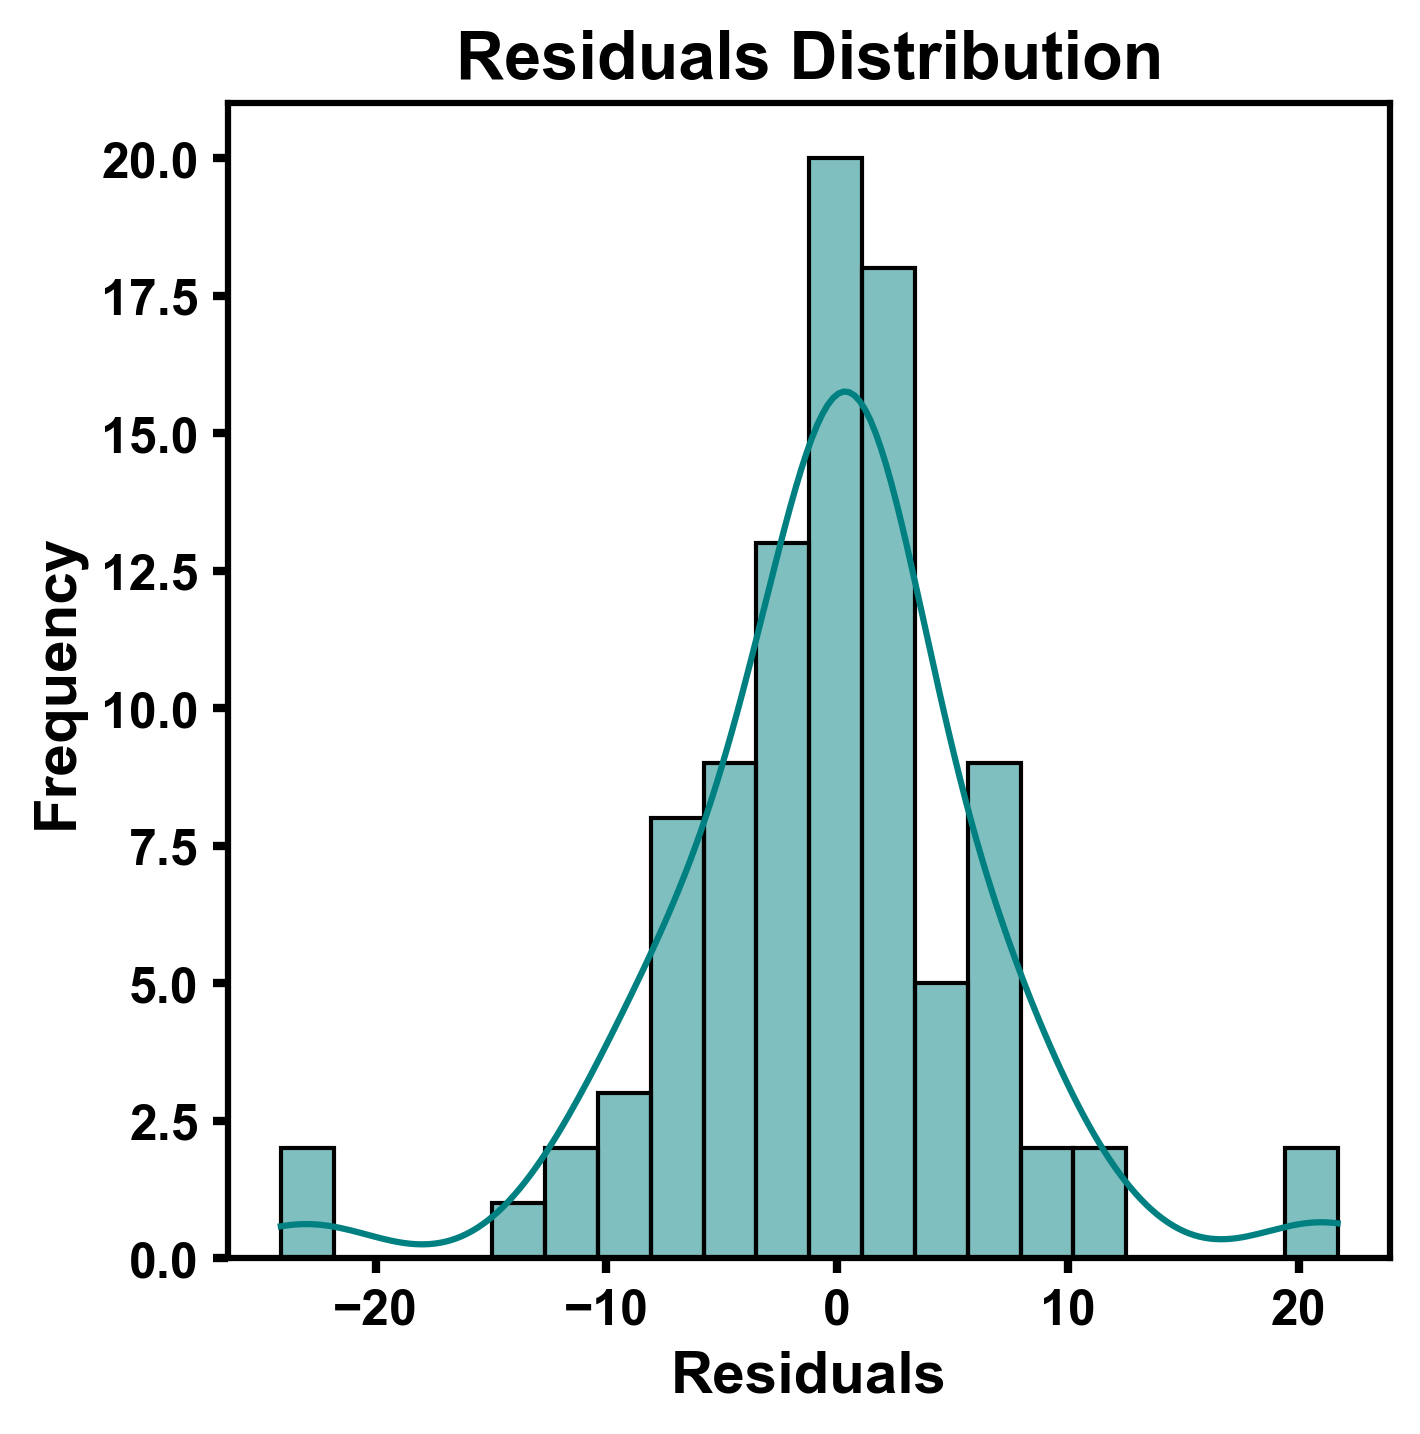

In [25]:

from matplotlib.font_manager import FontProperties


residuals =y_class_train - y_RFR_pre_train


fig, ax = plt.subplots(figsize=(5, 5), dpi=300)
sns.histplot(residuals, kde=True, color='teal', bins=20, ax=ax)


ax.spines['top'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['left'].set_linewidth(1.5)
ax.spines['right'].set_linewidth(1.5)


ax.tick_params(axis='both', which='both', width=2)


ax.tick_params(axis='both', labelsize=12)


ax.set_xlabel('Residuals', fontsize=14, fontname='Arial', fontweight='bold')
ax.set_ylabel('Frequency', fontsize=14, fontname='Arial', fontweight='bold')

ax.set_title('Residuals Distribution', fontsize=16, fontname='Arial', fontweight='bold')
plt.savefig('RFR1.PNG', format='PNG')
plt.show()
plt.show()


## test

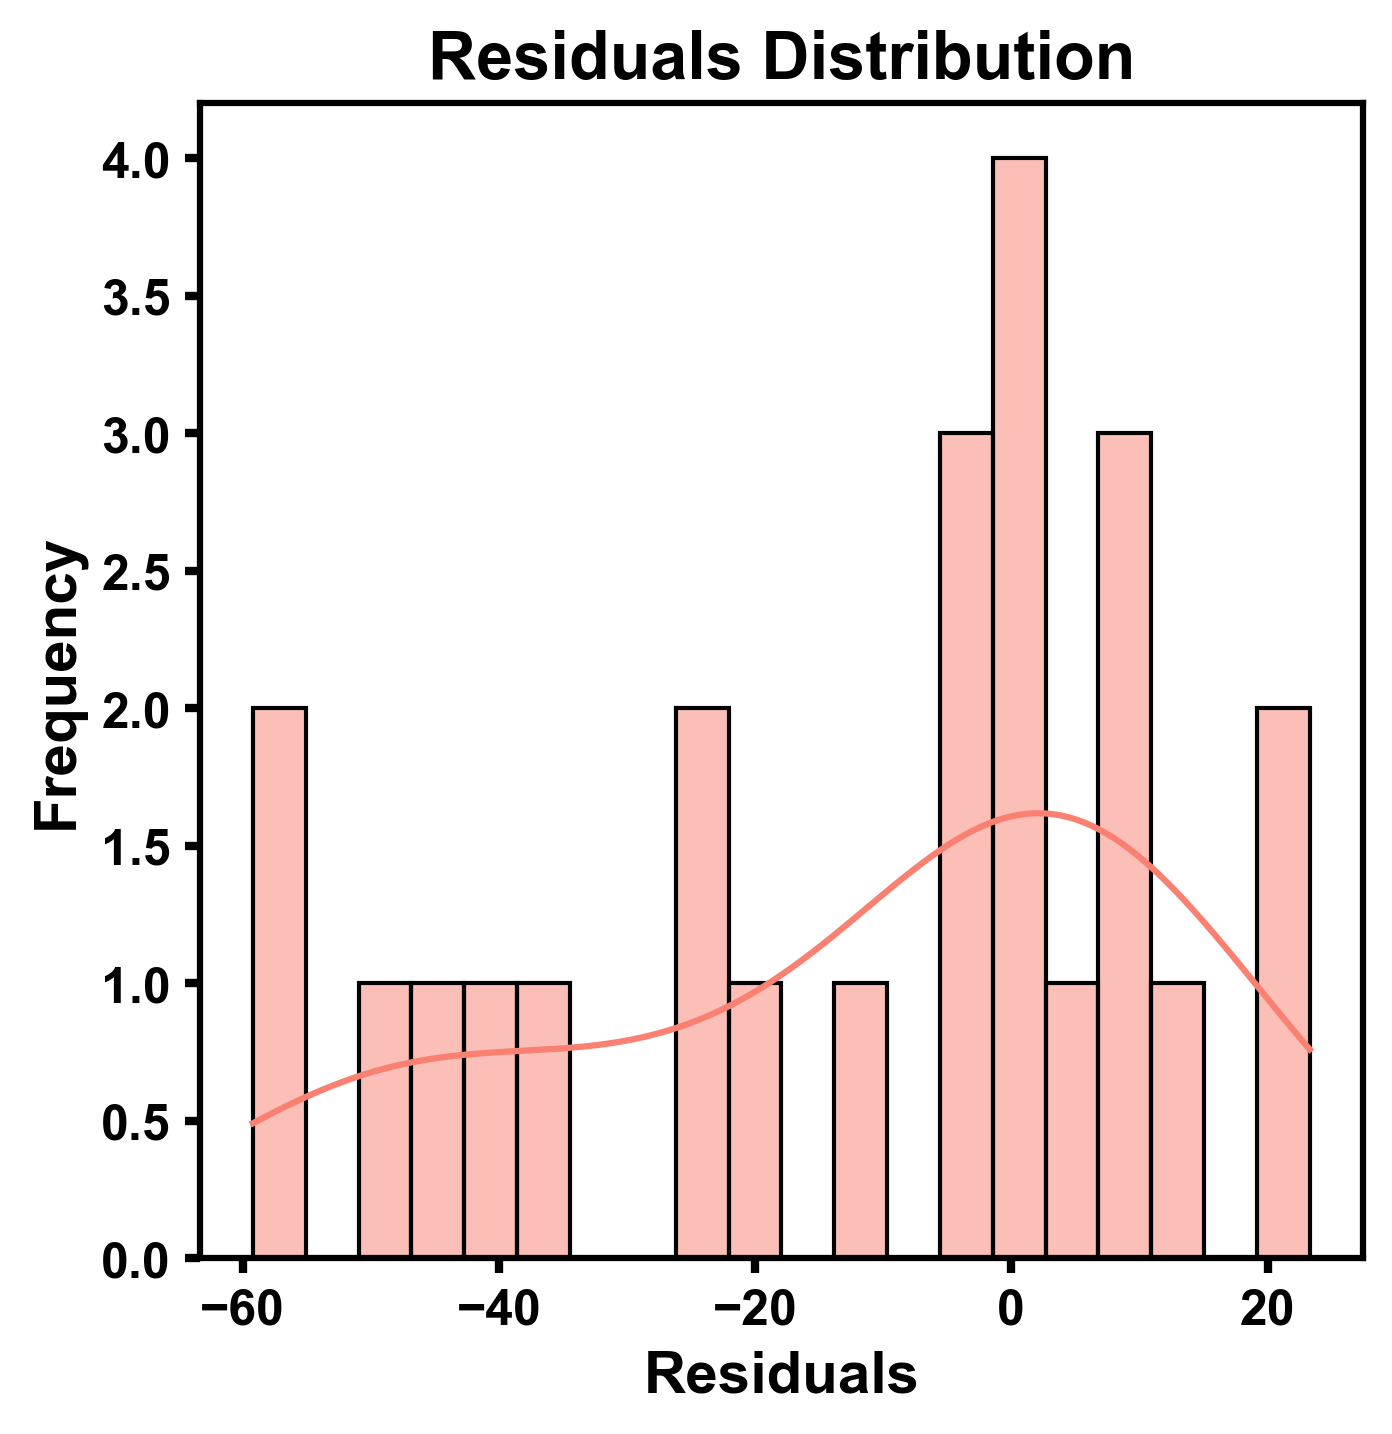

In [26]:

from matplotlib.font_manager import FontProperties

residuals =y_class_test - y_RFR_pred


fig, ax = plt.subplots(figsize=(5, 5), dpi=300)
sns.histplot(residuals, kde=True, color='salmon', bins=20, ax=ax)

ax.spines['top'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['left'].set_linewidth(1.5)
ax.spines['right'].set_linewidth(1.5)


ax.tick_params(axis='both', which='both', width=2)


ax.tick_params(axis='both', labelsize=12)


ax.set_xlabel('Residuals', fontsize=14, fontname='Arial', fontweight='bold')
ax.set_ylabel('Frequency', fontsize=14, fontname='Arial', fontweight='bold')


ax.set_title('Residuals Distribution', fontsize=16, fontname='Arial', fontweight='bold')
plt.savefig('RFR2.PNG', format='PNG')
plt.show()
plt.show()
